In [ ]:
# 📊 Model Evaluation and Metrics – Titanic Dataset
# This notebook demonstrates key classification metrics using Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, classification_report
)

In [3]:
# Load Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [4]:
# Preprocessing
df = df.drop(['Cabin', 'Ticket', 'Name', 'Embarked'], axis=1)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19984\3991014576.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
# Features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [7]:
# Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

In [8]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Analyse des métriques principales
Précision (Precision) : 76,8 %
→ Parmi les passagers prédits comme survivants, environ 77 % ont effectivement survécu.

Rappel (Recall) : 71,6 %
→ Le modèle détecte environ 72 % des survivants réels. Il en manque donc encore certains (faux négatifs).

F1-score : 74,1 %
→ Bonne balance entre précision et rappel. Le modèle est relativement équilibré.

ROC AUC Score : 87,5 %
→ Excellente capacité à distinguer les classes. Cela montre que le modèle a un très bon potentiel de discrimination entre survivants et non survivants.

In [9]:
# Accuracy, Precision, Recall, F1, AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1 Score: 0.7412587412587412
ROC AUC Score: 0.8745173745173744


Performance globale
Le modèle de régression logistique entraîné sur le dataset Titanic atteint une accuracy de 79,3 %, ce qui signifie qu’environ 8 prédictions sur 10 sont correctes sur l’échantillon de test. Ce score est encourageant pour un modèle simple avec peu de variables explicatives.

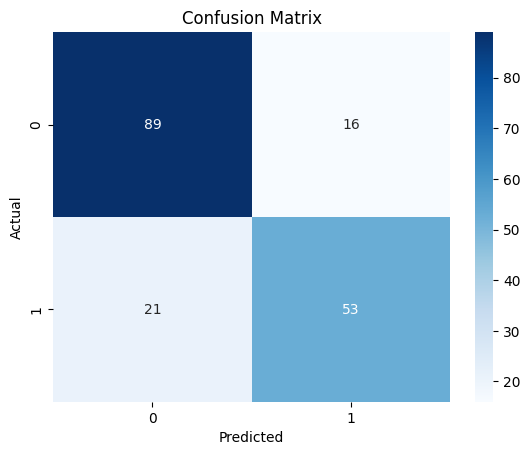

In [10]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Vrais positifs (TP) : 53 survivants bien prédits

Faux positifs (FP) : 16 personnes prédites à tort comme survivantes

Faux négatifs (FN) : 21 survivants non détectés (le modèle les a considérés comme morts)

Vrais négatifs (TN) : 89 passagers correctement prédits comme morts

Le modèle préfère minimiser les faux positifs que les faux négatifs, ce qui peut être ajusté selon le contexte métier.

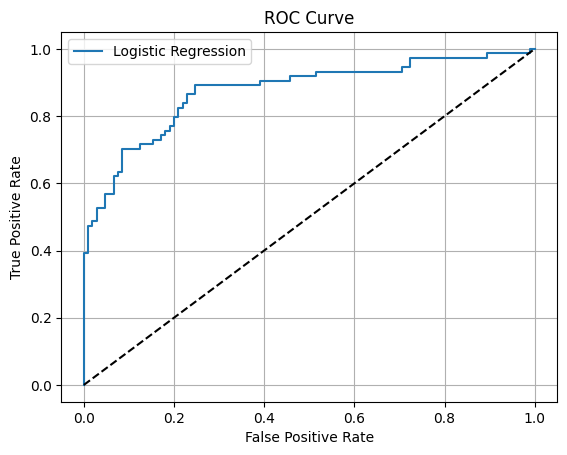

In [11]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

La courbe ROC montre une forte montée dès les premiers faux positifs, ce qui est typique d’un modèle performant. L’AUC de 0.875 confirme la très bonne capacité de séparation du modèle entre les deux classes.

## Courbe Precision-Recall (PR Curve)

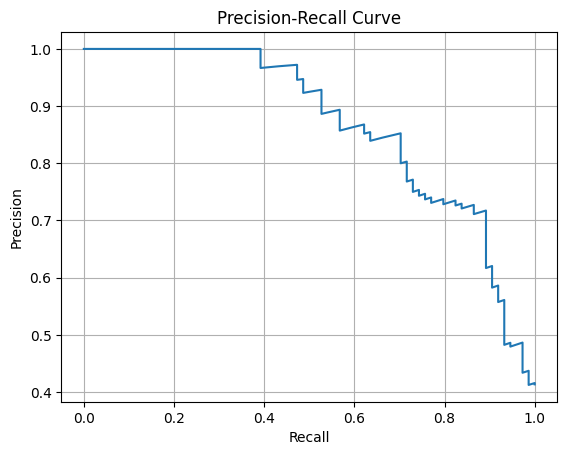

In [12]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


c:\Users\Admin\Desktop\Data Science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Admin\Desktop\Data Science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


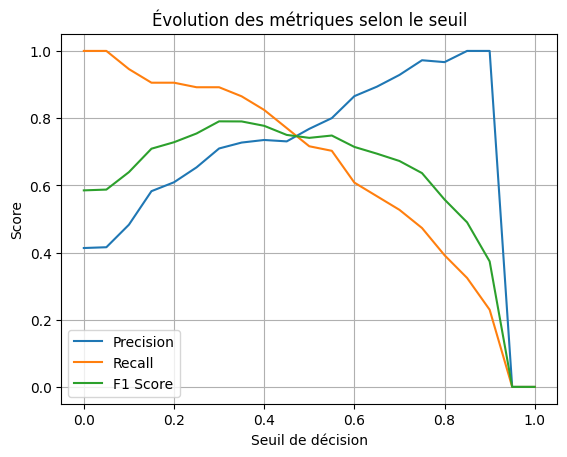

In [13]:
thresholds = np.arange(0, 1.01, 0.05)
prec_list = []
rec_list = []
f1_list = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    prec_list.append(precision_score(y_test, y_pred_thresh))
    rec_list.append(recall_score(y_test, y_pred_thresh))
    f1_list.append(f1_score(y_test, y_pred_thresh))

plt.plot(thresholds, prec_list, label="Precision")
plt.plot(thresholds, rec_list, label="Recall")
plt.plot(thresholds, f1_list, label="F1 Score")
plt.xlabel("Seuil de décision")
plt.ylabel("Score")
plt.title("Évolution des métriques selon le seuil")
plt.legend()
plt.grid(True)
plt.show()


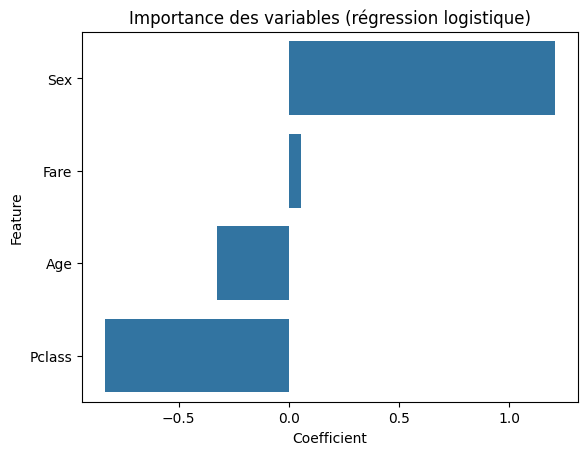

In [14]:
coeffs = pipe.named_steps['clf'].coef_[0]
features = X.columns
importance = pd.DataFrame({'Feature': features, 'Coefficient': coeffs})
importance.sort_values('Coefficient', ascending=False, inplace=True)
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Importance des variables (régression logistique)")
plt.show()


In [15]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
print("Accuracy CV moyenne :", cv_scores.mean())


Accuracy CV moyenne : 0.7856317870817902
